In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option("max_columns",250)

In [3]:
wnba = pd.read_csv("wnba.csv")
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,3,9,12,12,7,0,14,50,0,0


In [5]:
wnba.Experience.dtype

dtype('O')

In [6]:
wnba.Experience.unique()

array(['2', '12', '4', '6', 'R', '8', '5', '3', '1', '9', '10', '11', '7',
       '13', '14', '15'], dtype=object)

In [8]:
wnba.Experience.value_counts(dropna = False)

R     23
3     19
6     14
5     14
1     12
2     11
9     11
4     11
10     5
7      4
11     4
12     4
14     3
13     3
8      3
15     2
Name: Experience, dtype: int64

In [10]:
pd.isnull(np.nan)

True

In [11]:
def category(x):
    
    if pd.isnull(x):
        return "Rookie"
    elif 0 < x <= 3:
        return "Little Experience"
    elif 3 < x <= 5:
        return "Experienced"
    elif 5 < x <= 10:
        return "very Experienced"
    elif x > 10:
        return "Veteran"

In [16]:
pd.to_numeric(wnba["Experience"], errors = "coerce").value_counts(dropna = False)


NaN     23
3.0     19
5.0     14
6.0     14
1.0     12
9.0     11
4.0     11
2.0     11
10.0     5
7.0      4
11.0     4
12.0     4
14.0     3
13.0     3
8.0      3
15.0     2
Name: Experience, dtype: int64

In [21]:
wnba["Exp_ordinal"] = pd.to_numeric(wnba["Experience"], errors = "coerce").apply(category)
wnba["Exp_ordinal"].value_counts()

Little Experience    42
very Experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

In [24]:
value = wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,-1]]
value

Rookie               23
Little Experience    42
Experienced          25
very Experienced     37
Veteran              16
Name: Exp_ordinal, dtype: int64

Nominal, Ordinal --> bar or pie chart

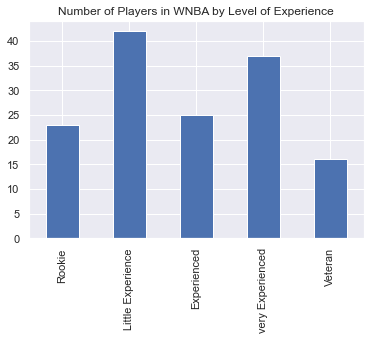

In [26]:
# absolute frq

value.plot.bar(title="Number of Players in WNBA by Level of Experience")
plt.show()

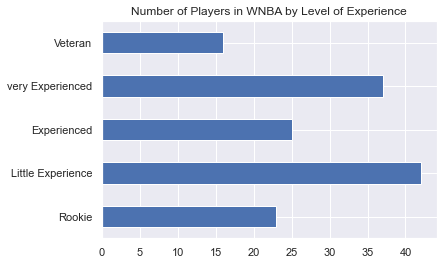

In [27]:
# absolute frq

value.plot.barh(title="Number of Players in WNBA by Level of Experience")
plt.show()

In [29]:
value = (wnba["Exp_ordinal"].value_counts(normalize = True).iloc[[3,0,2,1,-1]])*100
value

Rookie               16.083916
Little Experience    29.370629
Experienced          17.482517
very Experienced     25.874126
Veteran              11.188811
Name: Exp_ordinal, dtype: float64

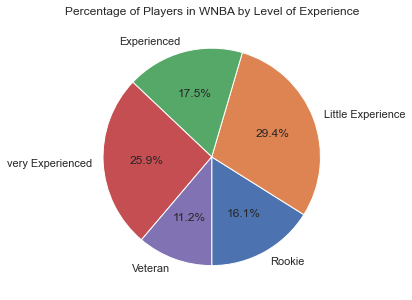

In [37]:
# relative frq

value.plot.pie(title="Percentage of Players in WNBA by Level of Experience", startangle = -90,
              autopct = "%.1f%%", figsize = (5,5))
plt.ylabel("")
plt.show()

<AxesSubplot:>

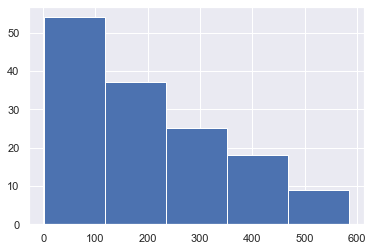

In [41]:
wnba["PTS"].hist(bins = 5)

In [42]:
wnba["PTS"].value_counts(bins = 5)

(1.417, 118.4]    54
(118.4, 234.8]    37
(234.8, 351.2]    25
(351.2, 467.6]    18
(467.6, 584.0]     9
Name: PTS, dtype: int64

In [50]:
interval = pd.interval_range(0,600,freq=100, closed = "right")
interval

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')

In [53]:
interval_frq = pd.Series(index=interval, data = 0)
interval_frq

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64

In [57]:
for i in wnba["PTS"]:
    for j in interval:
        if i in j:
            interval_frq.loc[j] += 1
            break

In [58]:
interval_frq

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64

In [67]:
wnba["PTS"].value_counts(bins = list(range(0,601,100)))

(-0.001, 100.0]    49
(200.0, 300.0]     32
(100.0, 200.0]     28
(300.0, 400.0]     17
(400.0, 500.0]     10
(500.0, 600.0]      7
Name: PTS, dtype: int64

<AxesSubplot:>

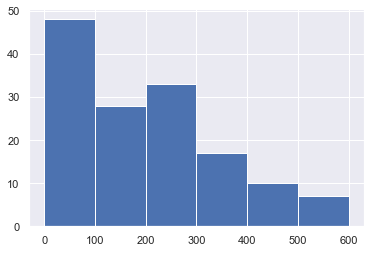

In [70]:
wnba["PTS"].hist(bins = list(range(0,601,100)))